In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.gridspec import GridSpec
import seaborn as sns

# import data_clean_utils
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot
import plotly.express as px
import timeit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.exceptions import DataConversionWarning


warnings.filterwarnings("default", category=DataConversionWarning)

# import sys
# import importlib
# sys.path.append("../files_")
# import data_clean_script

# importlib.reload(data_clean_script)     # reload

In [2]:
from sklearn import set_config

set_config(transform_output="pandas")

# Import


In [3]:
original_df = pd.read_csv("../files_/train.csv")

In [4]:
import sys
import importlib

sys.path.append("../files_")
import data_clean_script

importlib.reload(data_clean_script)

<module 'data_clean_script' from '/Users/rabinpoudel/Documents/Code_code_Code/Anaconda/delivery_time_pred/notebooks/../files_/data_clean_script.py'>

In [5]:
df = data_clean_script.perform_data_cleaning(original_df)

In [6]:
original_df.shape, df.shape

((45593, 20), (45502, 19))

In [7]:
df.sample(10)

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
30356,27.0,4.8,windy,jam,0,snack,motorcycle,2.0,no,metropolitian,38,VAD,3,tuesday,0,10.0,evening,16.659917,very_long
21070,39.0,4.8,sunny,low,1,drinks,motorcycle,1.0,no,NaN,10,HYD,3,tuesday,0,10.0,morning,3.073772,short
30629,34.0,5.0,sunny,high,0,meal,motorcycle,1.0,no,metropolitian,29,AURG,2,friday,0,5.0,afternoon,6.105333,medium
36938,28.0,4.6,sandstorms,low,2,snack,scooter,NaN,no,urban,13,RANCHI,3,monday,0,15.0,morning,1.509480,short
19239,25.0,4.5,sandstorms,low,2,meal,scooter,1.0,no,metropolitian,12,SUR,3,saturday,1,15.0,morning,3.040650,short
32598,38.0,4.7,windy,jam,1,drinks,scooter,1.0,no,metropolitian,25,PUNE,3,wednesday,0,15.0,night,19.916195,very_long
20311,38.0,4.7,stormy,high,2,buffet,scooter,1.0,no,metropolitian,27,CHEN,3,friday,0,5.0,morning,6.209976,medium
36472,23.0,4.8,windy,medium,0,buffet,motorcycle,1.0,no,metropolitian,33,BHP,2,saturday,1,5.0,evening,16.608067,very_long
34708,26.0,4.3,cloudy,jam,1,buffet,motorcycle,2.0,no,metropolitian,41,MUM,3,wednesday,0,10.0,night,19.890514,very_long
2902,32.0,4.5,sunny,jam,0,buffet,motorcycle,1.0,no,metropolitian,20,AURG,2,thursday,0,10.0,night,7.631464,medium


In [8]:
df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
city_name                 0
order_month               0
order_day_of_week         0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      2070
distance               3630
distance_type          3630
dtype: int64

In [9]:
df.isna().sum().sum(), df.duplicated().sum()

(18186, 0)

<Axes: >

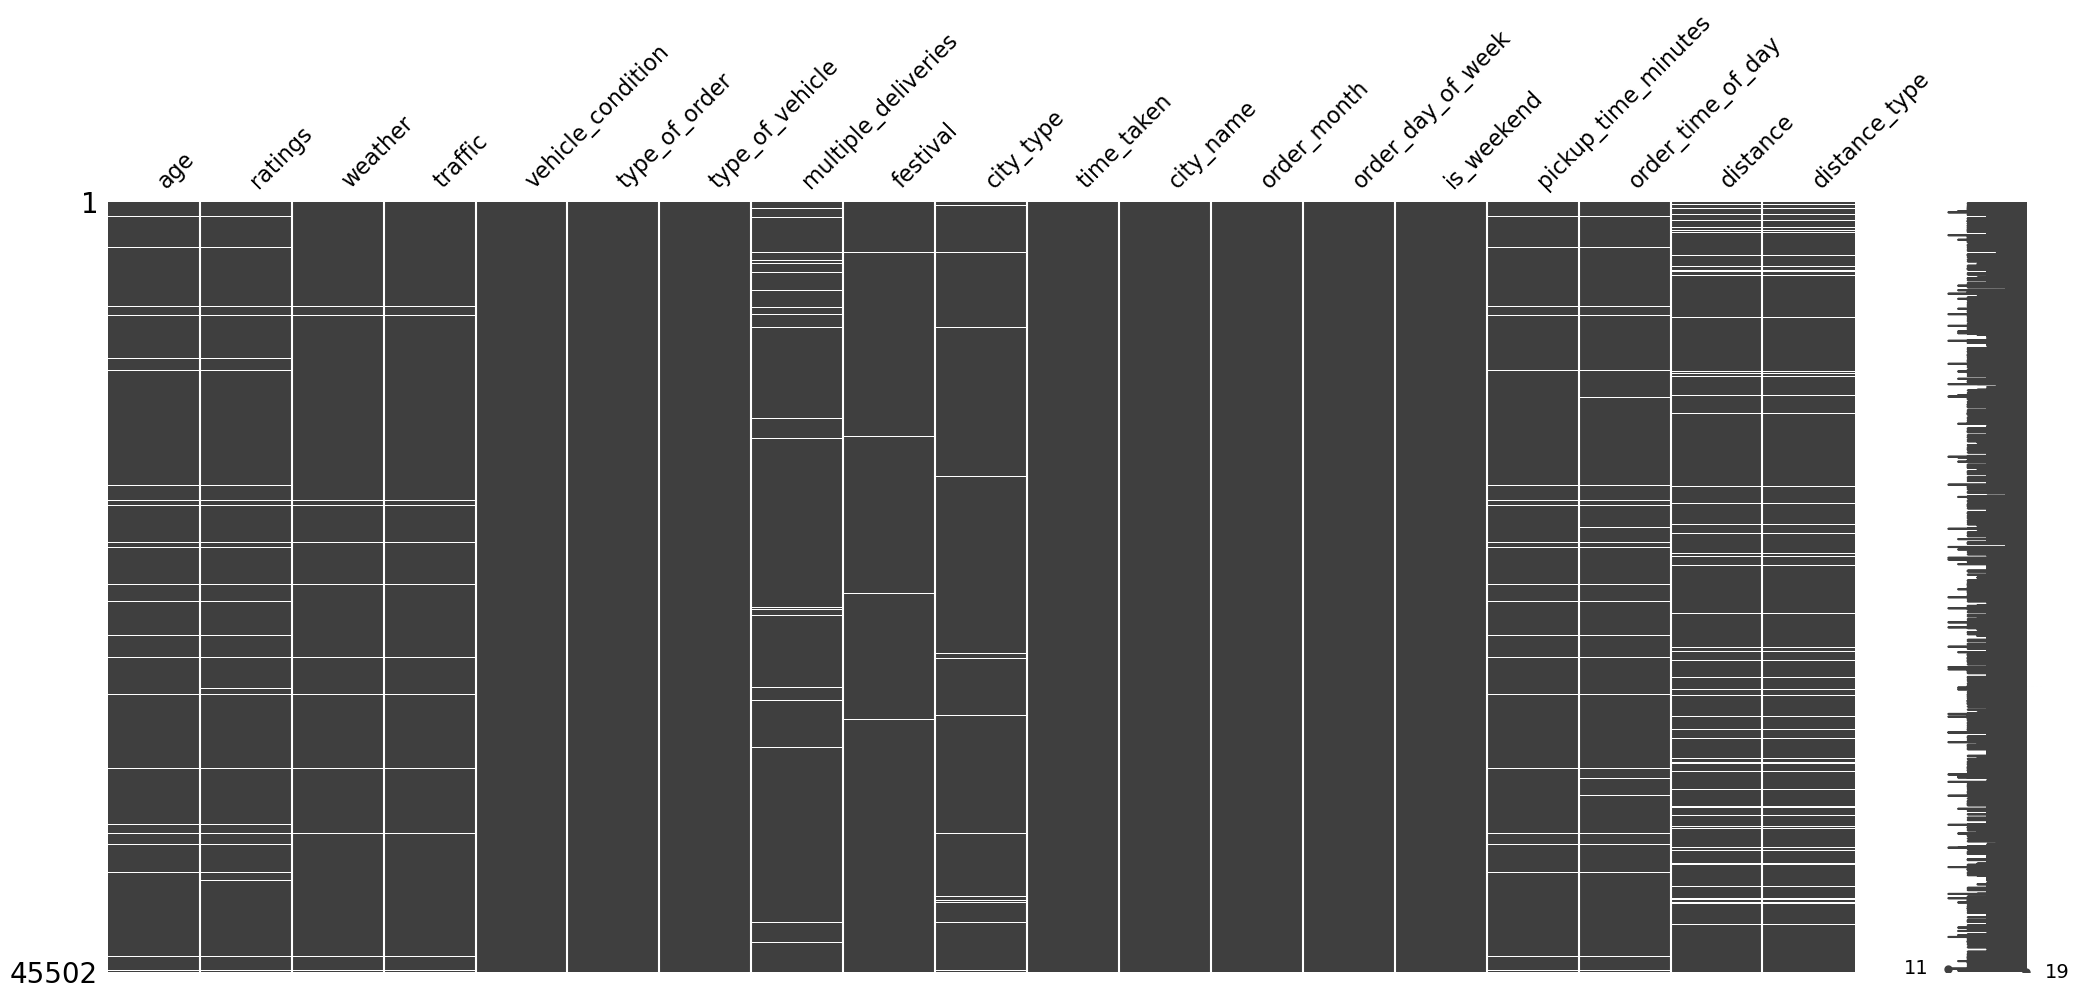

In [10]:
msno.matrix(df)

In [11]:
missing_cols = df.isna().any(axis=0).loc[lambda x: x].index
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

# Baseline model

- without imputation


In [12]:
temp_df = df.copy(deep=True).dropna()

In [13]:
temp_df.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
time_taken             0
city_name              0
order_month            0
order_day_of_week      0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
distance_type          0
dtype: int64

In [14]:
temp_df.shape

(37695, 19)

In [15]:
X = temp_df.drop(columns="time_taken", axis=1)
y = temp_df["time_taken"]
X.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,INDO,3,saturday,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,BANG,3,friday,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,BANG,3,saturday,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,tuesday,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,CHEN,3,saturday,1,15.0,afternoon,6.210138,medium


In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytest.shape, ytrain.shape

((30156, 18), (7539, 18), (7539,), (30156,))

In [17]:
temp_df.columns.tolist()

['age',
 'ratings',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'time_taken',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'pickup_time_minutes',
 'order_time_of_day',
 'distance',
 'distance_type']

In [18]:
num_cols = ["age", "ratings", "pickup_time_minutes", "distance"]

nominal_cat_cols = [
    "weather",
    "type_of_order",
    "type_of_vehicle",
    "festival",
    "city_type",
    "city_name",
    "order_month",
    "order_day_of_week",
    "order_time_of_day",
    "is_weekend",
]
ordinal_cat_cols = ["traffic", "distance_type"]

In [19]:
for col in ordinal_cat_cols:
    print(col, temp_df[col].unique())

traffic ['high' 'jam' 'low' 'medium']
distance_type ['short', 'very_long', 'medium', 'long']
Categories (4, object): ['short' < 'medium' < 'long' < 'very_long']


In [20]:
traffic_order = ["low", "medium", "high", "jam"]
distance_order = ["short", "medium", "long", "very_long"]

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", MinMaxScaler(), num_cols),
        (
            "nominal_encode",
            OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False),
            nominal_cat_cols,
        ),
        (
            "ordinal_encode",
            OrdinalEncoder(categories=[traffic_order, distance_order]),
            ordinal_cat_cols,
        ),
    ],
    remainder="passthrough",
    n_jobs=3,
    verbose_feature_names_out=False,
)
preprocessor.set_output(transform="pandas")

ColumnTransformer(n_jobs=3, remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'order_time_of_day', 'is_weekend']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [22]:
xtrain_transform = preprocessor.fit_transform(xtrain)
xtest_transform = preprocessor.transform(xtest)

In [23]:
xtrain_transform.head()

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,order_day_of_week_tuesday,order_day_of_week_wednesday,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,is_weekend_1,traffic,distance_type,vehicle_condition,multiple_deliveries
8720,0.473684,0.56,1.0,0.404165,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,0,2.0
25245,1.000000,0.76,0.0,0.154044,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1.0
34118,0.473684,0.80,0.5,0.002461,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1,0.0
26036,1.000000,0.92,1.0,0.460411,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0,1.0
37194,0.526316,0.76,0.5,0.243676,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1.0


In [24]:
# yeo=johnson transfor in label
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

y_train_transformed = pt.fit_transform(ytrain.values.reshape(-1, 1))
y_test_transformed = pt.transform(ytest.values.reshape(-1, 1))

In [25]:
y_train_transformed

,x0
0,2.028672
1,0.554539
2,-2.024267
3,-0.173699
4,0.554539
...,...
30151,0.457580
30152,-0.173699
30153,-1.350937
30154,0.047111


In [26]:
pt.lambdas_

array([0.32446096])

# Model I -- baseline model


In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain_transform, y_train_transformed)

LinearRegression()

In [28]:
transformed_res = lr.predict(xtest_transform)
print("mae_transformed_yoe :", mean_absolute_error(y_test_transformed, transformed_res))
lr1 = LinearRegression()
lr1.fit(xtrain_transform, ytrain)
original_pred = lr1.predict(xtest_transform)
print("original-ytest :", mean_absolute_error(ytest, original_pred))

mae_transformed_yoe : 0.5154786687507606
original-ytest : 4.684188706200984


In [29]:
transformed_res

array([[ 0.16426446],
       [ 0.48287179],
       [ 0.58686043],
       ...,
       [ 0.70188119],
       [ 0.07723214],
       [-0.66821693]])

In [30]:
y_pred_test_inverse = pt.inverse_transform(transformed_res.reshape(-1, 1))

In [31]:
y_pred_test_inverse

array([[27.10373511],
       [30.25878684],
       [31.3381296 ],
       ...,
       [32.56099252],
       [26.28093231],
       [19.88873853]])

### Train error and test error


In [32]:
ytrain_pred = pt.inverse_transform(lr.predict(xtrain_transform).reshape(-1, 1))
ytest_pred = pt.inverse_transform(lr.predict(xtest_transform).reshape(-1, 1))
print("MAE: Train error: ", mean_absolute_error(ytrain, ytrain_pred))
print("MAE: Test error: ", mean_absolute_error(ytest, ytest_pred))

MAE: Train error:  4.7050241534221415
MAE: Test error:  4.689894700994873


In [33]:
print("r2: Train score: ", r2_score(ytrain, ytrain_pred))
print("r2: Test score: ", r2_score(ytest, ytest_pred))

r2: Train score:  0.6009446783414196
r2: Test score:  0.596774227957171


## Impute Missing value


In [34]:
temp_df = df.copy(deep=True)

In [35]:
X = temp_df.drop(columns="time_taken")
y = temp_df["time_taken"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
xtrain.shape, xtest.shape, xtrain.shape[0] + xtest.shape[0], temp_df.shape

((36401, 18), (9101, 18), 45502, (45502, 19))

In [37]:
xtrain.isna().sum().sum()

14565

In [38]:
xtest.isna().sum().sum()

3621

In [39]:
pt = PowerTransformer()

y_train_transformed = pt.fit_transform(ytrain.values.reshape(-1, 1))

y_test_transformed = pt.transform(ytest.values.reshape(-1, 1))

In [40]:
ytrain.values.reshape(-1, 1)

array([[19],
       [20],
       [29],
       ...,
       [33],
       [29],
       [30]])

In [41]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [42]:
xtrain.isna().any(axis=1).mean().round(2)

0.17

In [43]:
xtrain.isna().any(axis=1)

11047    False
15692    False
14499     True
29258    False
22554    False
         ...  
11303    False
44821    False
38234     True
860      False
15822    False
Length: 36401, dtype: bool

## Age


In [44]:
xtrain.age.describe()

count    34931.000000
mean        29.569551
std          5.752869
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

In [45]:
xtrain.age.isna().sum()

1470

In [46]:
age_median = xtrain.age.median()
age_median

30.0

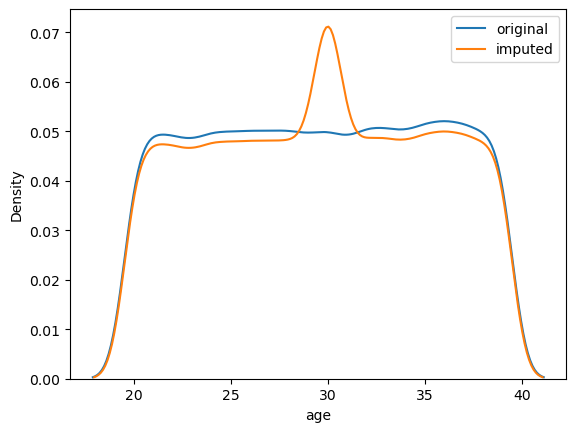

In [47]:
sns.kdeplot(xtrain["age"], label="original")
sns.kdeplot(xtrain["age"].fillna(age_median), label="imputed")
plt.legend()

distribution changed and peak appeared at age 30

- so advance method should be tried(knn imputer)


## Rating


In [48]:
xtrain["ratings"].describe()

count    34891.000000
mean         4.635058
std          0.314049
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: ratings, dtype: float64

In [49]:
rating_median = xtrain["ratings"].median()
rating_median, xtrain.ratings.isna().sum()

(4.7, 1510)

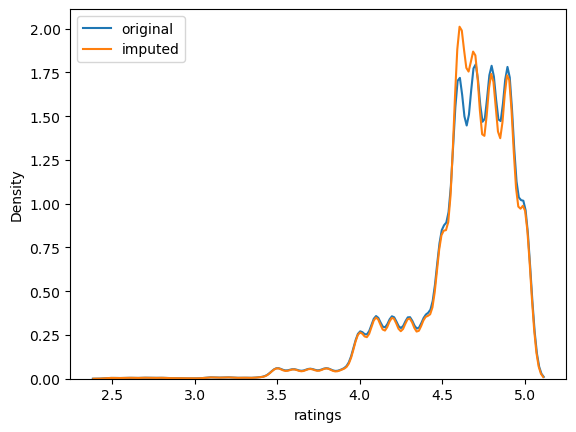

In [50]:
sns.kdeplot(xtrain["ratings"], label="original")
sns.kdeplot(xtrain["ratings"].fillna(xtrain.ratings.mean()), label="imputed")
plt.legend()

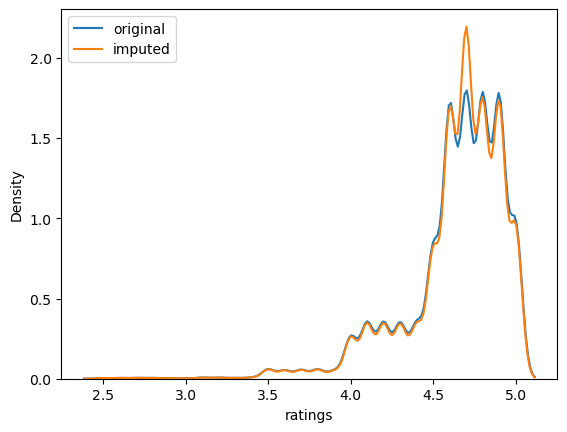

In [51]:
sns.kdeplot(xtrain["ratings"], label="original")
sns.kdeplot(xtrain["ratings"].fillna(rating_median), label="imputed")
plt.legend()

medain imputation is good


## Weather


In [52]:
xtrain.weather.value_counts(dropna=False)

weather
fog           6160
stormy        6051
cloudy        6033
sandstorms    5958
windy         5928
sunny         5850
NaN            421
Name: count, dtype: int64

all categories are uniform ,

if (421)nan are imputed with mode fog will dominate and current uniform distribution will change to fog dominated


<Axes: xlabel='count', ylabel='weather'>

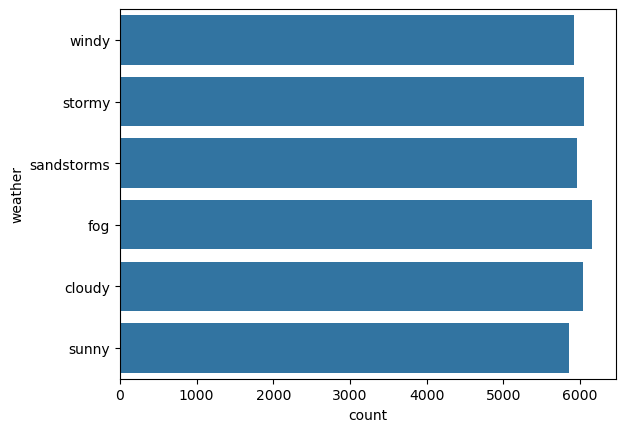

In [53]:
sns.countplot(xtrain["weather"])

In [ ]:
# better to use a missing indicator with weather column imputed to represent missingness

from sklearn.impute import MissingIndicator

missing_weather = MissingIndicator()
missing_weather.set_output(transform="pandas")
pd.concat(
    [
        xtrain["weather"],
        missing_weather.fit_transform(xtrain["weather"].values.reshape(-1, 1)),
    ],
    axis=1,
)

,weather,missingindicator_x0
11047,windy,False
15692,windy,False
14499,stormy,False
29258,windy,False
22554,sandstorms,False
...,...,...
36378,NaN,False
36386,NaN,False
36387,NaN,False
36388,NaN,False


In [55]:
xtrain.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
11047,26.0,4.7,windy,jam,2,snack,electric_scooter,1.0,no,metropolitian,MUM,3,wednesday,0,10.0,evening,9.177684,medium
15692,21.0,4.9,windy,medium,2,drinks,motorcycle,1.0,no,metropolitian,SUR,3,thursday,0,5.0,afternoon,6.081536,medium
14499,NaN,NaN,stormy,low,2,meal,scooter,1.0,no,metropolitian,MYS,3,saturday,1,NaN,NaN,1.554563,short
29258,32.0,4.7,windy,medium,0,buffet,motorcycle,1.0,no,metropolitian,JAP,4,monday,0,15.0,evening,20.852271,very_long
22554,34.0,4.9,sandstorms,jam,1,meal,scooter,0.0,no,urban,RANCHI,3,wednesday,0,5.0,night,9.056096,medium


In [56]:
xtrain.columns.tolist()

['age',
 'ratings',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'pickup_time_minutes',
 'order_time_of_day',
 'distance',
 'distance_type']

weather is important feature so

cant drop and impute easily so add a missing indicator along with imputataion


## Traffic


In [57]:
xtrain["traffic"].value_counts()

traffic
low       12323
jam       11320
medium     8773
high       3578
Name: count, dtype: int64

similar uniform and large difference distribution

so cant easily impute thus apply missing indicator


<Axes: xlabel='count', ylabel='traffic'>

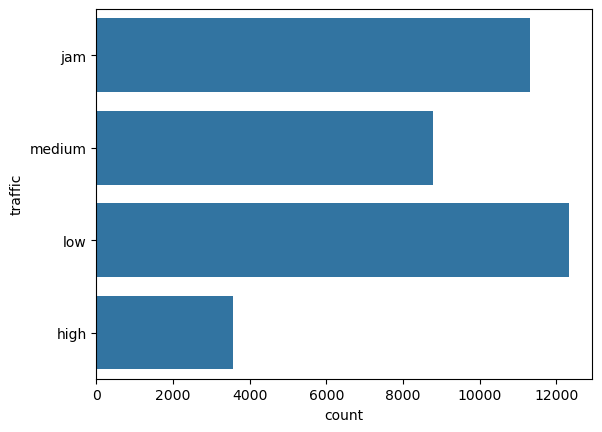

In [58]:
sns.countplot(xtrain.traffic)

## Multiple Delivery


In [59]:
xtrain["multiple_deliveries"].value_counts(dropna=False)

multiple_deliveries
1.0    22487
0.0    11252
2.0     1599
NaN      795
3.0      268
Name: count, dtype: int64

1 is the dominating category here

so can impute with 1


<Axes: xlabel='count', ylabel='multiple_deliveries'>

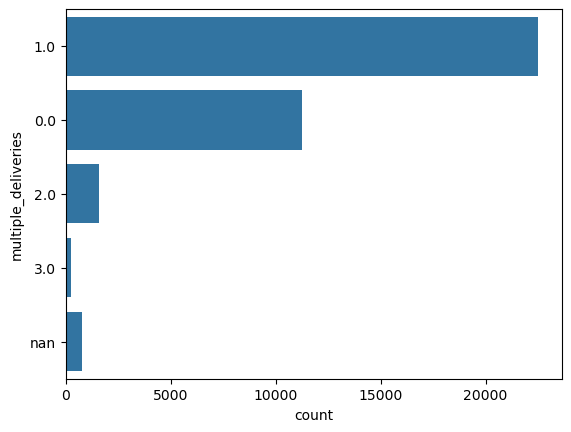

In [62]:
sns.countplot(xtrain["multiple_deliveries"].apply(str))

In [ ]:
multi_delivery_mode = xtrain.multiple_deliveries.mode()[0]
multi_delivery_mode

1.0

<Axes: xlabel='count', ylabel='multiple_deliveries'>

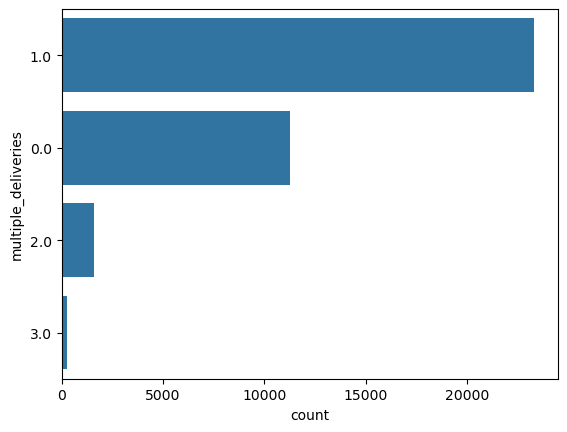

In [66]:
sns.countplot(xtrain["multiple_deliveries"].fillna(multi_delivery_mode).apply(str))

## Festival


In [68]:
xtrain["festival"].value_counts(dropna=False)

festival
no     35474
yes      739
NaN      188
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='festival'>

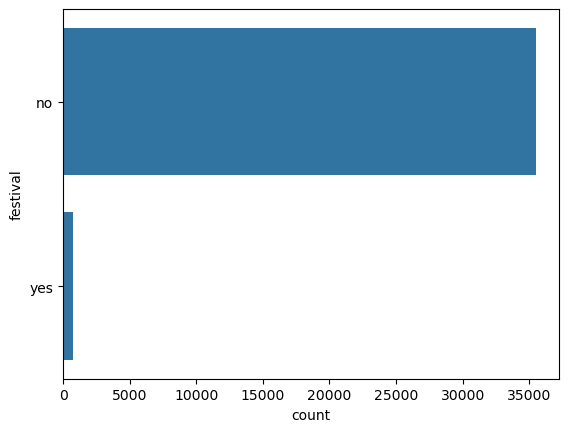

In [70]:
sns.countplot(xtrain["festival"])

<Axes: xlabel='count', ylabel='festival'>

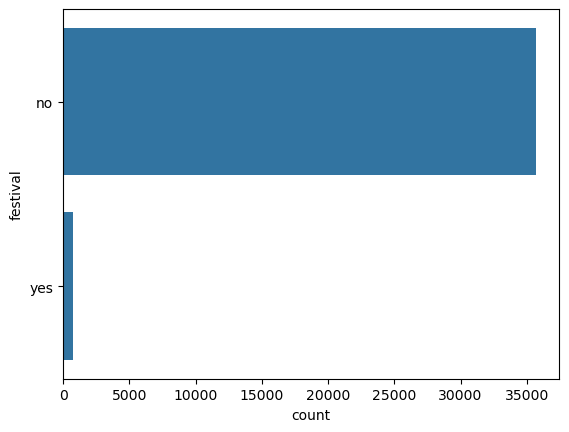

In [71]:
sns.countplot(xtrain["festival"].fillna(xtrain.festival.mode()[0]))

yes is clearly the dominating category so

impute mode


In [73]:
festival_mode=xtrain["festival"].mode()[0]
festival_mode

'no'

## City type